<a href="https://colab.research.google.com/github/roberto-dionisio/introPyTorch/blob/main/basic_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F #move data forward
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Iris classification lol

1.   input layer
2.   hidden layer(s)
3.   output layer


In [ ]:
class Model(nn.Module):
  #input layer has 4 features (of the flower) -> h1 -> h2 -> output (3 classes of flowers)
  def __init__(self, in_features=4, h1=8, h2=8, output=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1) #input layer, fully connected 1, 2 and so on, Linear Model
    self.fc2 = nn.Linear(h1, h2) #hidden layer
    self.out = nn.Linear(h2, output)

  def forward(self, x): #moves everything forward
    x = F.relu(self.fc1(x)) #rectified linear unit: less than 0 = 0, =x otherwise
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
torch.manual_seed(41)
model = Model()

#get the dataset
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.head(), my_df.tail()

(   sepal.length  sepal.width  petal.length  petal.width variety
 0           5.1          3.5           1.4          0.2  Setosa
 1           4.9          3.0           1.4          0.2  Setosa
 2           4.7          3.2           1.3          0.2  Setosa
 3           4.6          3.1           1.5          0.2  Setosa
 4           5.0          3.6           1.4          0.2  Setosa,
      sepal.length  sepal.width  petal.length  petal.width    variety
 145           6.7          3.0           5.2          2.3  Virginica
 146           6.3          2.5           5.0          1.9  Virginica
 147           6.5          3.0           5.2          2.0  Virginica
 148           6.2          3.4           5.4          2.3  Virginica
 149           5.9          3.0           5.1          1.8  Virginica)

In [ ]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)
my_df.head(), my_df.tail()

<ipython-input-5-1db3e5954c54>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2)


(   sepal.length  sepal.width  petal.length  petal.width  variety
 0           5.1          3.5           1.4          0.2        0
 1           4.9          3.0           1.4          0.2        0
 2           4.7          3.2           1.3          0.2        0
 3           4.6          3.1           1.5          0.2        0
 4           5.0          3.6           1.4          0.2        0,
      sepal.length  sepal.width  petal.length  petal.width  variety
 145           6.7          3.0           5.2          2.3        2
 146           6.3          2.5           5.0          1.9        2
 147           6.5          3.0           5.2          2.0        2
 148           6.2          3.4           5.4          2.3        2
 149           5.9          3.0           5.1          1.8        2)

In [ ]:
# we dont want the output among the input obv
X = my_df.drop('variety', axis=1)
y = my_df['variety']
#convert to np arrays
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)#test size is gonna be 20% the rest is training

In [ ]:
X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 4), (120, 4), (30, 4), (120,), (30,))

In [ ]:
#convert X and to tensors Float tensors (32bit, typical for training, model weights gradient based operations, the same woulda have been torch.tensor(bla bla, dtype=torch.float)) and Long ones (64bit integers, same story but with torch.long)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#How far off we are from the prediction aka we will use cross entropy loss and also an optimizer that as our satuff goes trough the NN it optimizes the weights i guess, we will uise the Adam optimizer (check the math)
criterion = nn.CrossEntropyLoss()
#1 epoch, stuff goes to fc1 and fc2
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #learning rate, the lower it is the longer is ognna take to learn
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

In [ ]:
#Its time to train, how many epochs? EPOCH := all training data trough the full NN
epochs = 100
losses = [] # keep track of the error/loss as we train, expected behaviour it should decrease after epochs
for i in range(epochs):
  #go forward and get a predicrtion
  y_pred = model.forward(X_train)
  #Measure the loss/error
  loss = criterion(y_pred, y_train)
  #keep track of losses
  losses.append(loss.detach().numpy()) #convert back to numpy array
  if i%10==0 : print(f'Epoch: {i} and loss: {loss}')
  #BAck propagation: take the error rate moving forward and you fedd it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1318365335464478
Epoch: 10 and loss: 0.9658561944961548
Epoch: 20 and loss: 0.6789938807487488
Epoch: 30 and loss: 0.4004894495010376
Epoch: 40 and loss: 0.22509503364562988
Epoch: 50 and loss: 0.12207334488630295
Epoch: 60 and loss: 0.07481689006090164
Epoch: 70 and loss: 0.054512783885002136
Epoch: 80 and loss: 0.04437492415308952
Epoch: 90 and loss: 0.03837944194674492


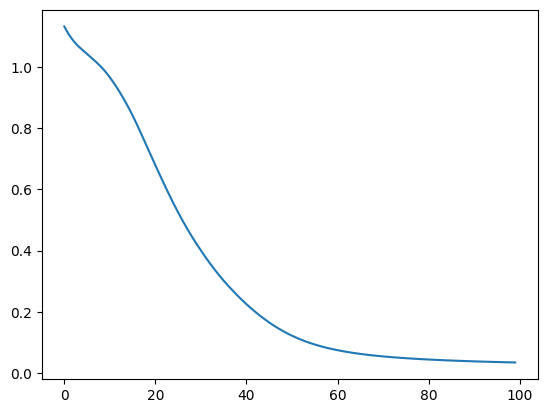

In [ ]:
plt.plot(losses)

In [ ]:
# Up till now we were working on our training data set, now we need to evaluate the model on test data
with torch.no_grad(): #Basically turn off back propagtion
  y_eval = model.forward(X_test) #y_eval will be prediction
  loss = criterion(y_eval, y_test)
loss # should be close to the last loss but it is a lil bit off

tensor(0.1458)

In [ ]:
correct = 0 # we got 30 of test
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    #the larger of the three number is gonna be what our NN think it is
    print(f'{i+1}:   {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}') # what type of flw our NN think it is
    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
    else: print('incorrect')
print(f'We got {correct} correct')
y_val.argmax().item(), y_val.argmax()

1:   tensor([-7.7212,  1.5826,  4.8685]) 	 2 	 2
2:   tensor([-10.2316,   0.5146,   8.7767]) 	 2 	 2
3:   tensor([-10.7282,   1.1893,   8.2408]) 	 2 	 2
4:   tensor([-4.4743,  3.5419, -1.1241]) 	 1 	 1
5:   tensor([-9.0954,  1.4687,  6.2899]) 	 2 	 2
6:   tensor([-2.2803,  3.7077, -4.1196]) 	 1 	 1
7:   tensor([-7.0740,  2.2070,  3.2966]) 	 2 	 2
8:   tensor([-4.2271,  3.6553, -1.5467]) 	 1 	 1
9:   tensor([-8.0707,  1.8280,  4.7897]) 	 2 	 2
10:   tensor([-10.8583,   0.5051,   9.3761]) 	 2 	 2
11:   tensor([-6.8676,  2.2165,  3.0858]) 	 2 	 2
12:   tensor([  9.4382,   3.2638, -18.8717]) 	 0 	 0
13:   tensor([  8.6037,   2.9307, -17.1502]) 	 0 	 0
14:   tensor([-1.0594,  3.1702, -4.7116]) 	 1 	 1
15:   tensor([  8.0310,   3.2450, -16.7844]) 	 0 	 0
16:   tensor([-6.7105,  2.4191,  2.6637]) 	 2 	 2
17:   tensor([  8.4678,   3.0888, -17.1317]) 	 0 	 0
18:   tensor([-7.6060,  1.7034,  4.5701]) 	 1 	 2
incorrect
19:   tensor([  9.8628,   3.2141, -19.4757]) 	 0 	 0
20:   tensor([  7.7276,  

(1, tensor(1))

In [ ]:
correct = 0 # we got 30 of test
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    if y_test[i] == 0:
      x = 'Setosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'
    #the larger of the three number is gonna be what our NN think it is
    print(f'{i+1}:   {str(y_val)} \t {x} \t {y_val.argmax().item()}') # what type of flw our NN think it is
    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
    else: print('incorrect')
print(f'We got {correct} correct')
y_val.argmax().item(), y_val.argmax()

1:   tensor([-7.7212,  1.5826,  4.8685]) 	 Virginica 	 2
2:   tensor([-10.2316,   0.5146,   8.7767]) 	 Virginica 	 2
3:   tensor([-10.7282,   1.1893,   8.2408]) 	 Virginica 	 2
4:   tensor([-4.4743,  3.5419, -1.1241]) 	 Versicolor 	 1
5:   tensor([-9.0954,  1.4687,  6.2899]) 	 Virginica 	 2
6:   tensor([-2.2803,  3.7077, -4.1196]) 	 Versicolor 	 1
7:   tensor([-7.0740,  2.2070,  3.2966]) 	 Virginica 	 2
8:   tensor([-4.2271,  3.6553, -1.5467]) 	 Versicolor 	 1
9:   tensor([-8.0707,  1.8280,  4.7897]) 	 Virginica 	 2
10:   tensor([-10.8583,   0.5051,   9.3761]) 	 Virginica 	 2
11:   tensor([-6.8676,  2.2165,  3.0858]) 	 Virginica 	 2
12:   tensor([  9.4382,   3.2638, -18.8717]) 	 Setosa 	 0
13:   tensor([  8.6037,   2.9307, -17.1502]) 	 Setosa 	 0
14:   tensor([-1.0594,  3.1702, -4.7116]) 	 Versicolor 	 1
15:   tensor([  8.0310,   3.2450, -16.7844]) 	 Setosa 	 0
16:   tensor([-6.7105,  2.4191,  2.6637]) 	 Virginica 	 2
17:   tensor([  8.4678,   3.0888, -17.1317]) 	 Setosa 	 0
18:   tens

(1, tensor(1))

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.21])
with torch.no_grad():
  model(new_iris)

In [ ]:
#How to save and load our model
torch.save(model.state_dict(),'my_iris_model.pt')

In [ ]:
#Load the model
new_model = Model()
#load all the weights and biased
new_model.load_state_dict(torch.load('my_iris_model.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)